In [3]:
# Example: Using Dask to process a large CSV file in parallel
# Install Dask if not already installed: !pip install dask[complete]
import dask.dataframe as dd

csv_path = r"C:\Users\ayo\Downloads\internship_dataset\OECD.DCD.FSD_DSD_CRS@DF_CRS_1_4_agri.csv"

# Read the CSV file as a Dask DataFrame (Dask will use all available CPU cores)
ddf = dd.read_csv(csv_path, blocksize="64MB", assume_missing=True)

# Example: Get the shape (rows, columns)
row_count = ddf.shape[0].compute()
col_count = ddf.shape[1]
print(f"Dask DataFrame shape: {row_count} rows, {col_count} columns")

# Example: Find columns with more than 90% missing values
total_rows = row_count
missing_counts = ddf.isnull().sum().compute()
mostly_empty_cols = missing_counts[missing_counts / total_rows > 0.9].index.tolist()
print(f"Columns with more than 90% missing values: {mostly_empty_cols}")

Dask DataFrame shape: 78100206 rows, 103 columns
Columns with more than 90% missing values: ['Microdata ID', 'Observation value', 'Base period', 'DONOR_AGENCY', 'Donor agency', 'OECD_ID', 'OECD ID', 'DONOR_PROJECT_ID', 'Donor project ID', 'REGION', 'Region', 'INCOME_GROUP', 'Income group', 'CHANNELDELIVERY_CODE', 'Channel of delivery code', 'CHANNELDELIVERY_NAME', 'Channel of delivery name', 'CATEGORY_CODE', 'Category code', 'CATEGORY_NAME', 'Category name', 'FINANCETYPE_CODE', 'FinanceType code', 'FINANCETYPE_NAME', 'FinanceType name', 'BIMULTI_CODE', 'BiMulti code', 'SHORT_DESCRIPTION', 'Short description', 'PROJECT_TITLE', 'Project title', 'LONG_DESCRIPTION', 'Long description', 'SDG_FOCUS', 'SDG focus', 'GENDER_EQUALITY', 'Gender equality', 'ENVIRONMENT', 'Environment', 'GOVERNANCE', 'Governance', 'RMNCH', 'RMNCH.1', 'DRR', 'DRR.1', 'NUTRITION', 'Nutrition', 'DISABILITY', 'Disability', 'BIODIVERSITY', 'Biodiversity', 'CLIMATE_MITIGATION', 'Climate mitigation', 'CLIMATE_ADAPTATION',

Dask DataFrame shape: 78100206 rows, 103 columns
Columns with more than 90% missing values: ['Microdata ID', 'Observation value', 'Base period', 'DONOR_AGENCY', 'Donor agency', 'OECD_ID', 'OECD ID', 'DONOR_PROJECT_ID', 'Donor project ID', 'REGION', 'Region', 'INCOME_GROUP', 'Income group', 'CHANNELDELIVERY_CODE', 'Channel of delivery code', 'CHANNELDELIVERY_NAME', 'Channel of delivery name', 'CATEGORY_CODE', 'Category code', 'CATEGORY_NAME', 'Category name', 'FINANCETYPE_CODE', 'FinanceType code', 'FINANCETYPE_NAME', 'FinanceType name', 'BIMULTI_CODE', 'BiMulti code', 'SHORT_DESCRIPTION', 'Short description', 'PROJECT_TITLE', 'Project title', 'LONG_DESCRIPTION', 'Long description', 'SDG_FOCUS', 'SDG focus', 'GENDER_EQUALITY', 'Gender equality', 'ENVIRONMENT', 'Environment', 'GOVERNANCE', 'Governance', 'RMNCH', 'RMNCH.1', 'DRR', 'DRR.1', 'NUTRITION', 'Nutrition', 'DISABILITY', 'Disability', 'BIODIVERSITY', 'Biodiversity', 'CLIMATE_MITIGATION', 'Climate mitigation', 'CLIMATE_ADAPTATION', 'Climate adaptation', 'DESERTIFICATION', 'Desertification', 'AMOUNT_TIED', 'Amount tied', 'AMOUNT_UNTIED', 'Amount untied', 'AMOUNT_PARTIALLY_UNTIED', 'Amount partially untied', 'NATURE_OF_SUBMISSION', 'Nature of submission', 'PSIFLAG_CODE', 'PSI flag', 'PSIFLAG_NAME', 'PSI Flag name']

In [ ]:
print(len(mostly_empty_cols))  # Count of columns with more than 90% missing values

69


In [ ]:
print(103-len(mostly_empty_cols))

34


In [ ]:
# Drop columns with more than 90% missing values and save the reduced dataset to Parquet
# This will significantly reduce the file size and make analysis faster

# Drop the mostly empty columns from the Dask DataFrame
ddf_reduced = ddf.drop(columns=mostly_empty_cols)

# Save the reduced DataFrame to a new Parquet file
reduced_parquet_path = r"C:\Users\ayo\Downloads\internship_dataset\OECD.DCD.FSD_DSD_CRS@DF_CRS_1_4_agri_reduced.parquet"
ddf_reduced.to_parquet(reduced_parquet_path)

# Print the new file size
import os
size_bytes = os.path.getsize(reduced_parquet_path)
size_gb = size_bytes / (1024 ** 3)
print(f"Reduced Parquet file size: {size_gb:.2f} GB")

Reduced Parquet file size: 0.00 GB


In [ ]:
size_gb

0.000244140625

In [4]:
# Read the reduced Parquet file and print the first few rows


reduced_parquet_path = r"C:\Users\ayo\Downloads\internship_dataset\OECD.DCD.FSD_DSD_CRS@DF_CRS_1_4_agri_reduced.parquet"
ddf_reduced = dd.read_parquet(reduced_parquet_path)

# Print the first 5 rows
ddf_reduced.head()

,DATAFLOW,STRUCTURE_NAME,ACTION,DONOR,Donor,RECIPIENT,Recipient,SECTOR,Sector,MEASURE,...,TIME_PERIOD,Time period,OBS_VALUE,BASE_PER,OBS_STATUS,Observation status,UNIT_MULT,Unit multiplier,DECIMALS,Decimals
0,OECD.DCD.FSD:DSD_CRS@DF_CRS(1.4),CRS: Creditor Reporting System (flows) [cloud ...,I,ALLM,Multilaterals organisations,BLZ,Belize,310.0,"Agriculture, forestry, fishing",100.0,...,2012.0,2012.0,5.745826,NaN,A,Normal value,6.0,Millions,3.0,Three
1,OECD.DCD.FSD:DSD_CRS@DF_CRS(1.4),CRS: Creditor Reporting System (flows) [cloud ...,I,ALLM,Multilaterals organisations,BLZ,Belize,310.0,"Agriculture, forestry, fishing",100.0,...,2012.0,2012.0,5.745826,NaN,A,Normal value,6.0,Millions,3.0,Three
2,OECD.DCD.FSD:DSD_CRS@DF_CRS(1.4),CRS: Creditor Reporting System (flows) [cloud ...,I,ALLM,Multilaterals organisations,BLZ,Belize,310.0,"Agriculture, forestry, fishing",100.0,...,2012.0,2012.0,5.745826,NaN,A,Normal value,6.0,Millions,3.0,Three
3,OECD.DCD.FSD:DSD_CRS@DF_CRS(1.4),CRS: Creditor Reporting System (flows) [cloud ...,I,ALLM,Multilaterals organisations,BLZ,Belize,310.0,"Agriculture, forestry, fishing",100.0,...,2012.0,2012.0,33.246406,NaN,A,Normal value,6.0,Millions,3.0,Three
4,OECD.DCD.FSD:DSD_CRS@DF_CRS(1.4),CRS: Creditor Reporting System (flows) [cloud ...,I,ALLM,Multilaterals organisations,BLZ,Belize,310.0,"Agriculture, forestry, fishing",100.0,...,2012.0,2012.0,33.246406,NaN,A,Normal value,6.0,Millions,3.0,Three


In [5]:
description = ddf_reduced.describe().compute()
print(description)

             SECTOR       MEASURE       MD_ID   TIME_PERIOD   Time period  \
count  7.810021e+07  7.810021e+07  78100206.0  7.810021e+07  7.810021e+07   
mean   2.007300e+04  5.264237e+01         0.0  2.014991e+03  2.014991e+03   
std    1.481724e+04  4.391235e+01         0.0  5.687494e+00  5.687494e+00   
min    3.100000e+02  1.100000e+01         0.0  1.995000e+03  1.995000e+03   
25%    3.130000e+02  1.100000e+01         0.0  2.012000e+03  2.012000e+03   
50%    3.116300e+04  1.000000e+02         0.0  2.016000e+03  2.016000e+03   
75%    3.119500e+04  1.000000e+02         0.0  2.020000e+03  2.020000e+03   
max    3.139100e+04  1.000000e+02         0.0  2.023000e+03  2.023000e+03   

          OBS_VALUE    BASE_PER   UNIT_MULT    DECIMALS  
count  7.810021e+07  39050124.0  78100206.0  78100206.0  
mean   1.333755e+01      2023.0         6.0         3.0  
std    8.605869e+01         0.0         0.0         0.0  
min   -3.250034e+01      2023.0         6.0         3.0  
25%    2.507960e

In [7]:
# Compute the number of unique values for all columns in the reduced Dask DataFrame
unique_counts = ddf_reduced.nunique().compute()
print(unique_counts)

DATAFLOW                     1
STRUCTURE_NAME               1
ACTION                       1
DONOR                      144
Donor                      144
RECIPIENT                  224
Recipient                  223
SECTOR                      33
Sector                      33
MEASURE                      7
Measure                      7
CHANNEL                      9
Channel                      9
MODALITY                    23
Modality                    21
FLOW_TYPE                    2
Flow type                    2
PRICE_BASE                   2
Price base                   2
MD_DIM                       1
Drilldown dimension          1
MD_ID                        1
UNIT_MEASURE                 1
Unit of measure              1
TIME_PERIOD                 29
Time period                 29
OBS_VALUE              4691418
BASE_PER                     1
OBS_STATUS                   1
Observation status           1
UNIT_MULT                    1
Unit multiplier              1
DECIMALS

In [8]:
# Find columns with less than 10 unique values and display their unique values
for col, count in unique_counts.items():
    if count < 10:
        uniques = ddf_reduced[col].unique().compute()
        print(f"{col} ({count} unique values): {uniques.tolist()}")

DATAFLOW (1 unique values): ['OECD.DCD.FSD:DSD_CRS@DF_CRS(1.4)']
STRUCTURE_NAME (1 unique values): ['CRS: Creditor Reporting System (flows) [cloud replica]']
STRUCTURE_NAME (1 unique values): ['CRS: Creditor Reporting System (flows) [cloud replica]']
ACTION (1 unique values): ['I']
ACTION (1 unique values): ['I']
MEASURE (7 unique values): [30.0, 100.0, 19.0, 11.0, 60.0, 13.0, 14.0]
MEASURE (7 unique values): [30.0, 100.0, 19.0, 11.0, 60.0, 13.0, 14.0]
Measure (7 unique values): ['Equity Investment', 'Other Official Flows (non Export Credit)', 'ODA Loans', 'Private sector instruments (PSI)', 'Official Development Assistance', 'Private Development Finance', 'ODA Grants']
Measure (7 unique values): ['Equity Investment', 'Other Official Flows (non Export Credit)', 'ODA Loans', 'Private sector instruments (PSI)', 'Official Development Assistance', 'Private Development Finance', 'ODA Grants']
CHANNEL (9 unique values): ['20000', '_T', '10000', '40000', '0', '30000', '60000', '50000', '90000

In [9]:
# Display the first 5 values of the 'OBS_VALUE' column from the reduced Dask DataFrame
ddf_reduced['OBS_VALUE'].head()

0     5.745826
1     5.745826
2     5.745826
3    33.246406
4    33.246406
Name: OBS_VALUE, dtype: float64

In [10]:
# List of columns to drop
cols_to_drop = [
    'Decimals', 'DECIMALS', 'UNIT_MULT', 'OBS_STATUS', 'Unit of measure',
    'MD_ID', 'PRICE_BASE', 'FLOW_TYPE', 'CHANNEL', 'MEASURE', 'ACTION', 'STRUCTURE_NAME'
]

# Drop the specified columns from the reduced Dask DataFrame
ddf_final = ddf_reduced.drop(columns=cols_to_drop)

In [12]:
# Compute the number of unique values for all columns in the reduced Dask DataFrame
unique_counts = ddf_final.nunique().compute()
print(unique_counts)

DATAFLOW                     1
DONOR                      144
Donor                      144
RECIPIENT                  224
Recipient                  223
SECTOR                      33
Sector                      33
Measure                      7
Channel                      9
MODALITY                    23
Modality                    21
Flow type                    2
Price base                   2
MD_DIM                       1
Drilldown dimension          1
UNIT_MEASURE                 1
TIME_PERIOD                 29
Time period                 29
OBS_VALUE              4691418
BASE_PER                     1
Observation status           1
Unit multiplier              1
dtype: int64


In [13]:
ddf_final.head()

,DATAFLOW,DONOR,Donor,RECIPIENT,Recipient,SECTOR,Sector,Measure,Channel,MODALITY,...,Price base,MD_DIM,Drilldown dimension,UNIT_MEASURE,TIME_PERIOD,Time period,OBS_VALUE,BASE_PER,Observation status,Unit multiplier
0,OECD.DCD.FSD:DSD_CRS@DF_CRS(1.4),ALLM,Multilaterals organisations,BLZ,Belize,310.0,"Agriculture, forestry, fishing",Official Development Assistance,All channels,_T,...,Current prices,_T,Aggregate,USD,2012.0,2012.0,5.745826,NaN,Normal value,Millions
1,OECD.DCD.FSD:DSD_CRS@DF_CRS(1.4),ALLM,Multilaterals organisations,BLZ,Belize,310.0,"Agriculture, forestry, fishing",Official Development Assistance,All channels,C,...,Current prices,_T,Aggregate,USD,2012.0,2012.0,5.745826,NaN,Normal value,Millions
2,OECD.DCD.FSD:DSD_CRS@DF_CRS(1.4),ALLM,Multilaterals organisations,BLZ,Belize,310.0,"Agriculture, forestry, fishing",Official Development Assistance,All channels,C01,...,Current prices,_T,Aggregate,USD,2012.0,2012.0,5.745826,NaN,Normal value,Millions
3,OECD.DCD.FSD:DSD_CRS@DF_CRS(1.4),ALLM,Multilaterals organisations,BLZ,Belize,310.0,"Agriculture, forestry, fishing",Official Development Assistance,All channels,_T,...,Current prices,_T,Aggregate,USD,2012.0,2012.0,33.246406,NaN,Normal value,Millions
4,OECD.DCD.FSD:DSD_CRS@DF_CRS(1.4),ALLM,Multilaterals organisations,BLZ,Belize,310.0,"Agriculture, forestry, fishing",Official Development Assistance,All channels,C,...,Current prices,_T,Aggregate,USD,2012.0,2012.0,33.246406,NaN,Normal value,Millions


In [14]:
# Print unique values for both 'RECIPIENT' and 'Recipient' columns in ddf_final
recipients_unique = ddf_final['RECIPIENT'].unique().compute()
recipients_unique_lower = ddf_final['Recipient'].unique().compute()
print(f"RECIPIENT unique values ({len(recipients_unique)}): {recipients_unique.tolist()}")
print(f"Recipient unique values ({len(recipients_unique_lower)}): {recipients_unique_lower.tolist()}")

RECIPIENT unique values (224): ['VEN', 'AFG', 'PHL', 'SLB', 'O', 'INC_X', 'TGO', 'BFA', 'SRB', 'MRT', 'O7_X', 'MYT', 'SYR', 'F4', 'O9', 'MWI', 'NER', 'UMICWB', 'LCA', 'DJI', 'KOR', 'JAM', 'IRN', 'JOR', 'MNG', 'F97', 'DPGC', 'ERI', 'GTM', 'LBR', 'MUS', 'GRD', 'TKL', 'BHR', 'F97_X', 'F', 'F7', 'SIDS', 'FSCAC', 'COM', 'OMN', 'A7_X', 'TON', 'VNM', 'MYS', 'COD', 'KEN', 'UGA', 'HTI', 'A', 'SYC', 'BIH', 'PSE', 'PRK', 'UMIC', 'F8', 'GIN', 'HND', 'E_X', 'DZA', 'NPL', 'TLS', 'WSM', 'DPGC_X', 'NGA', 'O7', 'MEX', 'ALB', 'UKR', 'SSD', 'ZAF', 'BLR', 'BDI', 'CRI', 'ATG', 'TUV', 'SHN', 'PAK', 'S7_X', 'PNG', 'O8', 'COL', 'ECU', 'EGY', 'HIPC', 'GNQ', 'MHL', 'A3_X', 'KGZ', 'F6_X', 'AGO', 'DOM', 'COG', 'A4_X', 'SFRY_X', 'URY', 'LKA', 'BGD', 'TZA', 'DMA', 'BOL', 'LBN', 'THA', 'O_X', 'LAO', 'GHA', 'O8_X', 'TCA', 'MLT', 'CHN', 'SLV', 'A4', 'XKV', 'MAR', 'TUR', 'TJK', 'E', 'ZWE', 'CIV', 'CHL', 'BLZ', 'PRY', 'ARG', 'AZE', 'YEM', 'MDV', 'OLIC', 'VCT', 'IND', 'LMIC', 'VUT', 'ETH', 'F5', 'IRQ', 'SDN', 'PLW', 'BRB

In [15]:
import pandas as pd

# For each unique value in 'RECIPIENT', get its first 5 appearances and corresponding 'Recipient'

# Compute a pandas DataFrame for efficient row selection
df_final = ddf_final[['RECIPIENT', 'Recipient']].compute()

result = {}
for rec in recipients_unique:
    matches = df_final[df_final['RECIPIENT'] == rec]['Recipient'].head(5).tolist()
    result[rec] = matches

# Example: print the first 3 entries
for k, v in list(result.items())[:3]:
    print(f"{k}: {v}")

VEN: ['Venezuela', 'Venezuela', 'Venezuela', 'Venezuela', 'Venezuela']
AFG: ['Afghanistan', 'Afghanistan', 'Afghanistan', 'Afghanistan', 'Afghanistan']
PHL: ['Philippines', 'Philippines', 'Philippines', 'Philippines', 'Philippines']


In [17]:
i=0
for k, v in list(result.items())[:]:
    print(f"{i} {k}: {v}")
    i+=1

0 VEN: ['Venezuela', 'Venezuela', 'Venezuela', 'Venezuela', 'Venezuela']
1 AFG: ['Afghanistan', 'Afghanistan', 'Afghanistan', 'Afghanistan', 'Afghanistan']
2 PHL: ['Philippines', 'Philippines', 'Philippines', 'Philippines', 'Philippines']
3 SLB: ['Solomon Islands', 'Solomon Islands', 'Solomon Islands', 'Solomon Islands', 'Solomon Islands']
4 O: ['Oceania', 'Oceania', 'Oceania', 'Oceania', 'Oceania']
5 INC_X: ['Countries unallocated by income', 'Countries unallocated by income', 'Countries unallocated by income', 'Countries unallocated by income', 'Countries unallocated by income']
6 TGO: ['Togo', 'Togo', 'Togo', 'Togo', 'Togo']
7 BFA: ['Burkina Faso', 'Burkina Faso', 'Burkina Faso', 'Burkina Faso', 'Burkina Faso']
8 SRB: ['Serbia', 'Serbia', 'Serbia', 'Serbia', 'Serbia']
9 MRT: ['Mauritania', 'Mauritania', 'Mauritania', 'Mauritania', 'Mauritania']
10 O7_X: ['Melanesia unspecified', 'Melanesia unspecified', 'Melanesia unspecified', 'Melanesia unspecified', 'Melanesia unspecified']
11 MY

In [18]:
# Count missing values in 'RECIPIENT' and 'Recipient' columns of ddf_final
missing_recipient = ddf_final['RECIPIENT'].isnull().sum().compute()
missing_recipient_lower = ddf_final['Recipient'].isnull().sum().compute()
print(f"Missing values in 'RECIPIENT': {missing_recipient}")
print(f"Missing values in 'Recipient': {missing_recipient_lower}")

Missing values in 'RECIPIENT': 0
Missing values in 'Recipient': 0


In [22]:
print(ddf_final.columns.tolist())

['DATAFLOW', 'DONOR', 'Donor', 'RECIPIENT', 'Recipient', 'SECTOR', 'Sector', 'Measure', 'Channel', 'MODALITY', 'Modality', 'Flow type', 'Price base', 'MD_DIM', 'Drilldown dimension', 'UNIT_MEASURE', 'TIME_PERIOD', 'Time period', 'OBS_VALUE', 'BASE_PER', 'Observation status', 'Unit multiplier']


In [20]:
print(f"Unique values in 'RECIPIENT': {recipients_unique.nunique()}")
print(f"Unique values in 'Recipient': {recipients_unique_lower.nunique()}")

Unique values in 'RECIPIENT': 224
Unique values in 'Recipient': 223


In [21]:
from collections import defaultdict

# Invert the result dictionary: value tuple -> list of keys
value_to_keys = defaultdict(list)
for k, v in result.items():
    value_to_keys[tuple(v)].append(k)

# Find value lists shared by more than one key
duplicates = {vals: keys for vals, keys in value_to_keys.items() if len(keys) > 1}

# Print duplicates
for vals, keys in duplicates.items():
    print(f"Keys {keys} have the same values: {list(vals)}")

Keys ['O8', 'FSM'] have the same values: ['Micronesia', 'Micronesia', 'Micronesia', 'Micronesia', 'Micronesia']


In [33]:
# Display the list of columns in ddf_final and one example value for each
for col in ddf_final.columns:
    value = ddf_final[col].head(1)
    print(f"{col}: {value}")

DATAFLOW: 0    OECD.DCD.FSD:DSD_CRS@DF_CRS(1.4)
Name: DATAFLOW, dtype: string
DONOR: 0    ALLM
Name: DONOR, dtype: string
Donor: 0    Multilaterals organisations
Name: Donor, dtype: string
RECIPIENT: 0    BLZ
Name: RECIPIENT, dtype: string
Recipient: 0    Belize
Name: Recipient, dtype: string
SECTOR: 0    310.0
Name: SECTOR, dtype: float64
Sector: 0    Agriculture, forestry, fishing
Name: Sector, dtype: string
Measure: 0    Official Development Assistance
Name: Measure, dtype: string
Channel: 0    All channels
Name: Channel, dtype: string
MODALITY: 0    _T
Name: MODALITY, dtype: string
Modality: 0    All modalities
Name: Modality, dtype: string
Flow type: 0    Disbursements
Name: Flow type, dtype: string
Price base: 0    Current prices
Name: Price base, dtype: string
MD_DIM: 0    _T
Name: MD_DIM, dtype: string
Drilldown dimension: 0    Aggregate
Name: Drilldown dimension, dtype: string
UNIT_MEASURE: 0    USD
Name: UNIT_MEASURE, dtype: string
TIME_PERIOD: 0    2012.0
Name: TIME_PERIOD, 

In [34]:
# Drop specified columns from ddf_final
cols_to_remove = ['DONOR', 'RECIPIENT', 'SECTOR', 'MODALITY', 'Time period']
ddf_final_dropped = ddf_final.drop(columns=cols_to_remove)
ddf_final_dropped.head()

,DATAFLOW,Donor,Recipient,Sector,Measure,Channel,Modality,Flow type,Price base,MD_DIM,Drilldown dimension,UNIT_MEASURE,TIME_PERIOD,OBS_VALUE,BASE_PER,Observation status,Unit multiplier
0,OECD.DCD.FSD:DSD_CRS@DF_CRS(1.4),Multilaterals organisations,Belize,"Agriculture, forestry, fishing",Official Development Assistance,All channels,All modalities,Disbursements,Current prices,_T,Aggregate,USD,2012.0,5.745826,NaN,Normal value,Millions
1,OECD.DCD.FSD:DSD_CRS@DF_CRS(1.4),Multilaterals organisations,Belize,"Agriculture, forestry, fishing",Official Development Assistance,All channels,Project-type interventions,Disbursements,Current prices,_T,Aggregate,USD,2012.0,5.745826,NaN,Normal value,Millions
2,OECD.DCD.FSD:DSD_CRS@DF_CRS(1.4),Multilaterals organisations,Belize,"Agriculture, forestry, fishing",Official Development Assistance,All channels,Project-type interventions,Disbursements,Current prices,_T,Aggregate,USD,2012.0,5.745826,NaN,Normal value,Millions
3,OECD.DCD.FSD:DSD_CRS@DF_CRS(1.4),Multilaterals organisations,Belize,"Agriculture, forestry, fishing",Official Development Assistance,All channels,All modalities,Commitments,Current prices,_T,Aggregate,USD,2012.0,33.246406,NaN,Normal value,Millions
4,OECD.DCD.FSD:DSD_CRS@DF_CRS(1.4),Multilaterals organisations,Belize,"Agriculture, forestry, fishing",Official Development Assistance,All channels,Project-type interventions,Commitments,Current prices,_T,Aggregate,USD,2012.0,33.246406,NaN,Normal value,Millions


In [36]:
import os

# Save ddf_final_dropped to a cleaned Parquet file instead of CSV
cleaned_parquet_path = r"C:\Users\ayo\Downloads\internship_dataset\OECD.DCD.FSD_DSD_CRS@DF_CRS_1_4_agri_cleaned.parquet"
ddf_final_dropped.to_parquet(cleaned_parquet_path)

# Check and print the Parquet file size
parquet_size_bytes = os.path.getsize(cleaned_parquet_path)
parquet_size_gb = parquet_size_bytes / (1024 ** 3)
print(f"Cleaned Parquet file size: {parquet_size_gb:.2f} GB")

Cleaned Parquet file size: 0.00 GB


In [37]:
import dask.dataframe as dd

# Read the cleaned Parquet file
ddf_cleaned = dd.read_parquet(cleaned_parquet_path)

# Display the first few rows
ddf_cleaned.head()

,DATAFLOW,Donor,Recipient,Sector,Measure,Channel,Modality,Flow type,Price base,MD_DIM,Drilldown dimension,UNIT_MEASURE,TIME_PERIOD,OBS_VALUE,BASE_PER,Observation status,Unit multiplier
0,OECD.DCD.FSD:DSD_CRS@DF_CRS(1.4),Multilaterals organisations,Belize,"Agriculture, forestry, fishing",Official Development Assistance,All channels,All modalities,Disbursements,Current prices,_T,Aggregate,USD,2012.0,5.745826,NaN,Normal value,Millions
1,OECD.DCD.FSD:DSD_CRS@DF_CRS(1.4),Multilaterals organisations,Belize,"Agriculture, forestry, fishing",Official Development Assistance,All channels,Project-type interventions,Disbursements,Current prices,_T,Aggregate,USD,2012.0,5.745826,NaN,Normal value,Millions
2,OECD.DCD.FSD:DSD_CRS@DF_CRS(1.4),Multilaterals organisations,Belize,"Agriculture, forestry, fishing",Official Development Assistance,All channels,Project-type interventions,Disbursements,Current prices,_T,Aggregate,USD,2012.0,5.745826,NaN,Normal value,Millions
3,OECD.DCD.FSD:DSD_CRS@DF_CRS(1.4),Multilaterals organisations,Belize,"Agriculture, forestry, fishing",Official Development Assistance,All channels,All modalities,Commitments,Current prices,_T,Aggregate,USD,2012.0,33.246406,NaN,Normal value,Millions
4,OECD.DCD.FSD:DSD_CRS@DF_CRS(1.4),Multilaterals organisations,Belize,"Agriculture, forestry, fishing",Official Development Assistance,All channels,Project-type interventions,Commitments,Current prices,_T,Aggregate,USD,2012.0,33.246406,NaN,Normal value,Millions


In [57]:
row_count = ddf_cleaned.shape[0].compute()
col_count = ddf_cleaned.shape[1]
print(f"ddf_cleaned shape: {row_count} rows, {col_count} columns")

ddf_cleaned shape: 78100206 rows, 17 columns


In [38]:
# Display descriptive statistics for all columns in ddf_cleaned
ddf_cleaned.describe().compute()

,TIME_PERIOD,OBS_VALUE,BASE_PER
count,7.810021e+07,7.810021e+07,39050124.0
mean,2.014991e+03,1.333755e+01,2023.0
std,5.687494e+00,8.605869e+01,0.0
min,1.995000e+03,-3.250034e+01,2023.0
25%,2.012000e+03,1.622040e-01,2023.0
50%,2.017000e+03,1.019044e+00,2023.0
75%,2.020000e+03,7.000000e+00,2023.0
max,2.023000e+03,1.481527e+04,2023.0


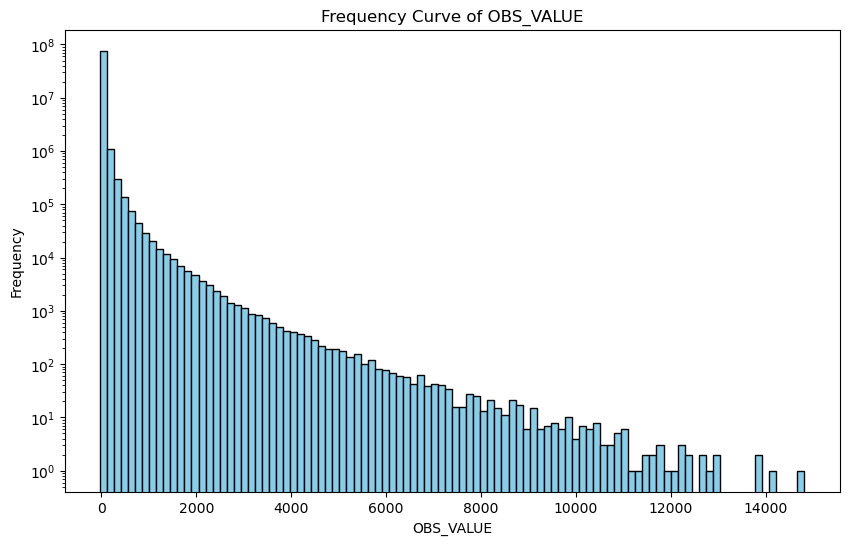

In [41]:
import matplotlib.pyplot as plt

# Compute histogram data for 'OBS_VALUE' column in ddf_cleaned
obs_values = ddf_cleaned['OBS_VALUE'].compute()

plt.figure(figsize=(10, 6))
plt.hist(obs_values, bins=100, color='skyblue', edgecolor='black')
plt.title('Frequency Curve of OBS_VALUE')
plt.xlabel('OBS_VALUE')
plt.ylabel('Frequency')
plt.yscale('log')  # Use log scale for better visualization if data is skewed
plt.show()

In [42]:
# Count the number of rows where 'OBS_VALUE' is exactly 0 in ddf_cleaned
obs_value_zero_count = (ddf_cleaned['OBS_VALUE'] == 0).sum().compute()
print(f"Number of rows where OBS_VALUE == 0: {obs_value_zero_count}")

Number of rows where OBS_VALUE == 0: 5278


In [43]:
# Count the number of rows where 'OBS_VALUE' is negative in ddf_cleaned
negative_obs_value_count = (ddf_cleaned['OBS_VALUE'] < 0).sum().compute()
print(f"Number of rows where OBS_VALUE < 0: {negative_obs_value_count}")

Number of rows where OBS_VALUE < 0: 96024


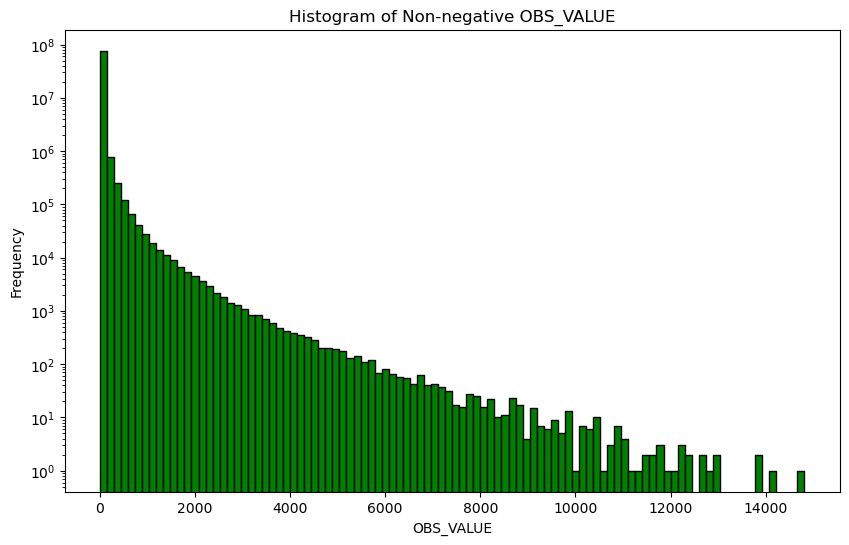

In [44]:
import matplotlib.pyplot as plt

# Filter non-negative OBS_VALUEs
non_negative_obs_values = obs_values[obs_values >= 0]

plt.figure(figsize=(10, 6))
plt.hist(non_negative_obs_values, bins=100, color='green', edgecolor='black')
plt.title('Histogram of Non-negative OBS_VALUE')
plt.xlabel('OBS_VALUE')
plt.ylabel('Frequency')
plt.yscale('log')
plt.show()

In [45]:
# Filter negative OBS_VALUEs from ddf_cleaned and describe them
negative_obs_values = ddf_cleaned[ddf_cleaned['OBS_VALUE'] < 0]['OBS_VALUE'].compute()
print(negative_obs_values.describe())

count    96024.000000
mean        -0.454878
std          2.410797
min        -32.500341
25%         -0.103269
50%         -0.009468
75%         -0.001078
max         -0.000001
Name: OBS_VALUE, dtype: float64


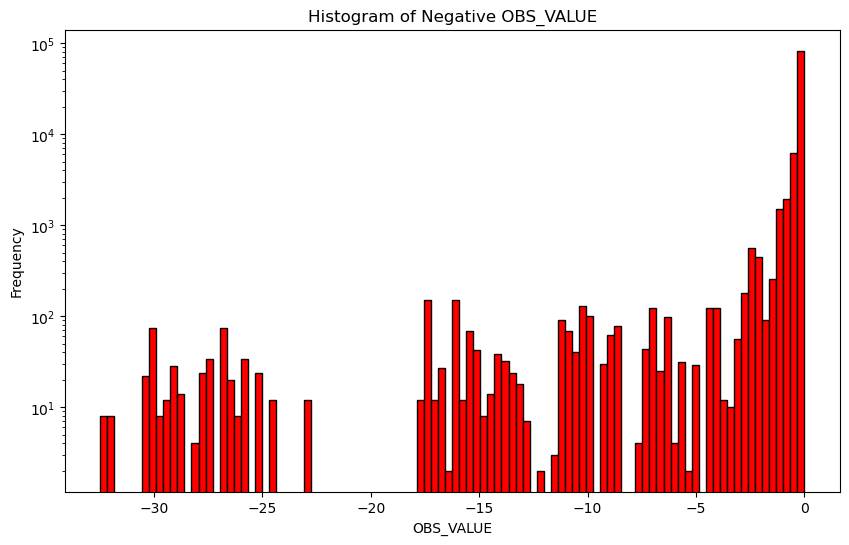

In [47]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(negative_obs_values, bins=100, color='red', edgecolor='black')
plt.title('Histogram of Negative OBS_VALUE')
plt.xlabel('OBS_VALUE')
plt.ylabel('Frequency')
plt.yscale('log')
plt.show()

In [49]:
# Count negative and positive OBS_VALUE for 'Disbursement' vs 'Commitment' in ddf_cleaned

# Ensure 'Flow type' column exists and is correct
if 'Flow type' in ddf_cleaned.columns:
    # Negative values
    neg_counts = ddf_cleaned[ddf_cleaned['OBS_VALUE'] < 0].groupby('Flow type').size().compute()
    # Positive values
    pos_counts = ddf_cleaned[ddf_cleaned['OBS_VALUE'] > 0].groupby('Flow type').size().compute()
    print("Negative OBS_VALUE counts by Flow type:")
    print(neg_counts)
    print("\nPositive OBS_VALUE counts by Flow type:")
    print(pos_counts)
else:
    print("'Flow type' column not found in ddf_cleaned.")

Negative OBS_VALUE counts by Flow type:
Flow type
Commitments       7108
Disbursements    88916
dtype: int64

Positive OBS_VALUE counts by Flow type:
Flow type
Commitments      34286734
Disbursements    43712170
dtype: int64


In [50]:
# Group by 'Recipient' and count positive and negative OBS_VALUEs
positive_counts = ddf_cleaned[ddf_cleaned['OBS_VALUE'] > 0].groupby('Recipient').size().compute()
negative_counts = ddf_cleaned[ddf_cleaned['OBS_VALUE'] < 0].groupby('Recipient').size().compute()

# Combine into a DataFrame for easy comparison
freq_by_recipient = pd.DataFrame({
    'positive_count': positive_counts,
    'negative_count': negative_counts
}).fillna(0).astype(int)

print(freq_by_recipient)

                            positive_count  negative_count
Recipient                                                 
Afghanistan                         286348             872
Africa                             2260764            1628
Africa unspecified                  430324             528
Albania                             168250             576
Algeria                             138794               0
...                                    ...             ...
Western Africa                     1338374             734
Western Africa unspecified           59346               0
Yemen                               124570             232
Zambia                              389102            1054
Zimbabwe                            271930            1020

[223 rows x 2 columns]


In [51]:
# Sort freq_by_recipient in descending order of positive_count
freq_by_recipient_sorted = freq_by_recipient.sort_values(by='positive_count', ascending=False)
print(freq_by_recipient_sorted)

                                            positive_count  negative_count
Recipient                                                                 
Developing countries                               3187392            2224
Africa                                             2260764            1628
Contexts in high and extreme fragility             2214258            1988
Lower-middle income countries (World Bank)         2146829            1653
Sub-Saharan Africa                                 2124884            1634
...                                                    ...             ...
Turks and Caicos Islands                               520               0
French Polynesia                                       320               0
Malta                                                  168               0
Israel                                                 144               0
New Caledonia                                          112               0

[223 rows x 2 columns]


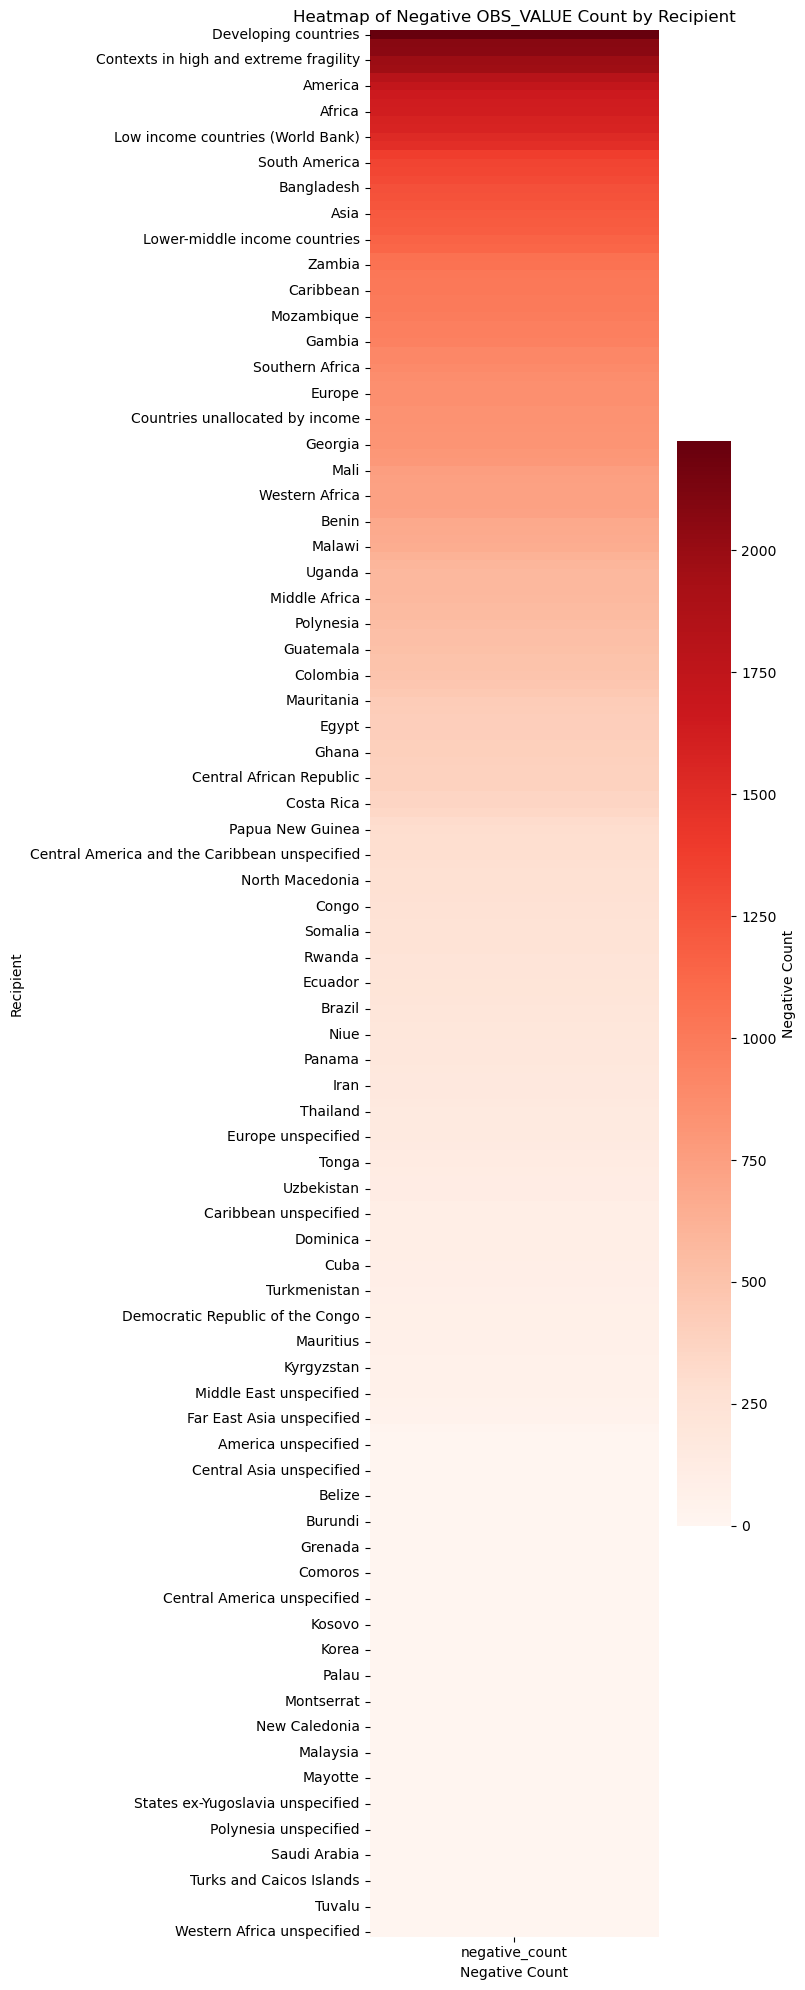

In [52]:
import seaborn as sns

import matplotlib.pyplot as plt

# Prepare data for heatmap: sort by negative_count
neg_counts_sorted = freq_by_recipient[['negative_count']].sort_values(by='negative_count', ascending=False)

plt.figure(figsize=(8, 20))
sns.heatmap(neg_counts_sorted, annot=False, cmap='Reds', cbar_kws={'label': 'Negative Count'})
plt.title('Heatmap of Negative OBS_VALUE Count by Recipient')
plt.xlabel('Negative Count')
plt.ylabel('Recipient')
plt.tight_layout()
plt.show()

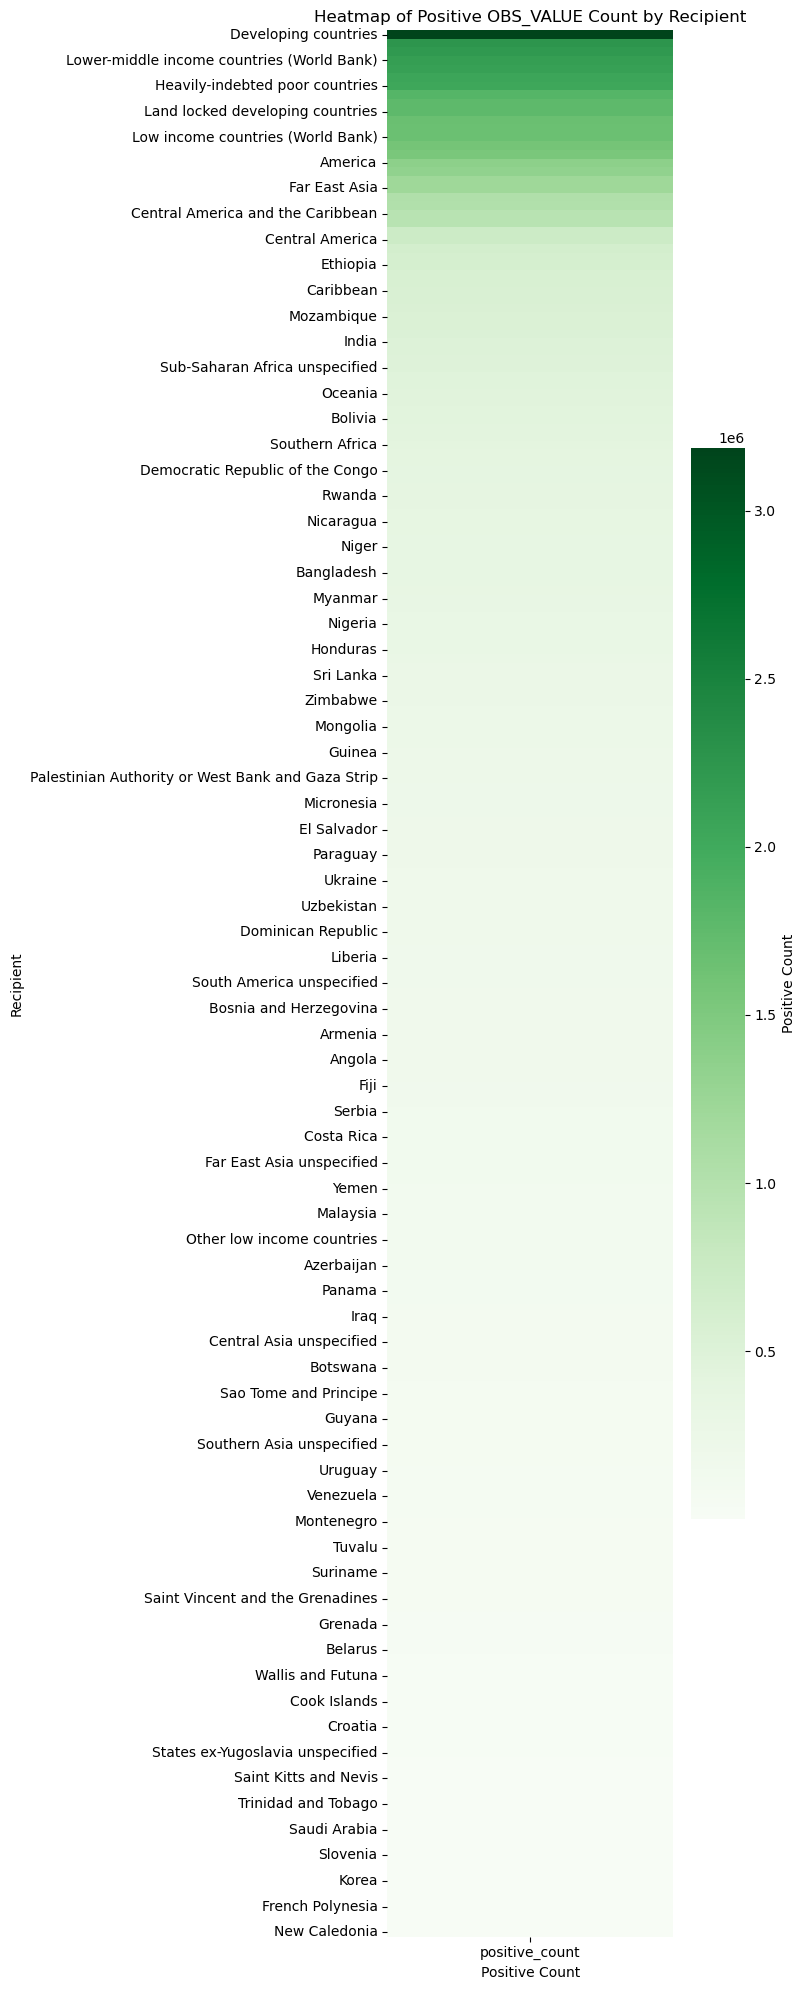

In [53]:
# Prepare data for heatmap: sort by positive_count
pos_counts_sorted = freq_by_recipient[['positive_count']].sort_values(by='positive_count', ascending=False)

plt.figure(figsize=(8, 20))
sns.heatmap(pos_counts_sorted, annot=False, cmap='Greens', cbar_kws={'label': 'Positive Count'})
plt.title('Heatmap of Positive OBS_VALUE Count by Recipient')
plt.xlabel('Positive Count')
plt.ylabel('Recipient')
plt.tight_layout()
plt.show()

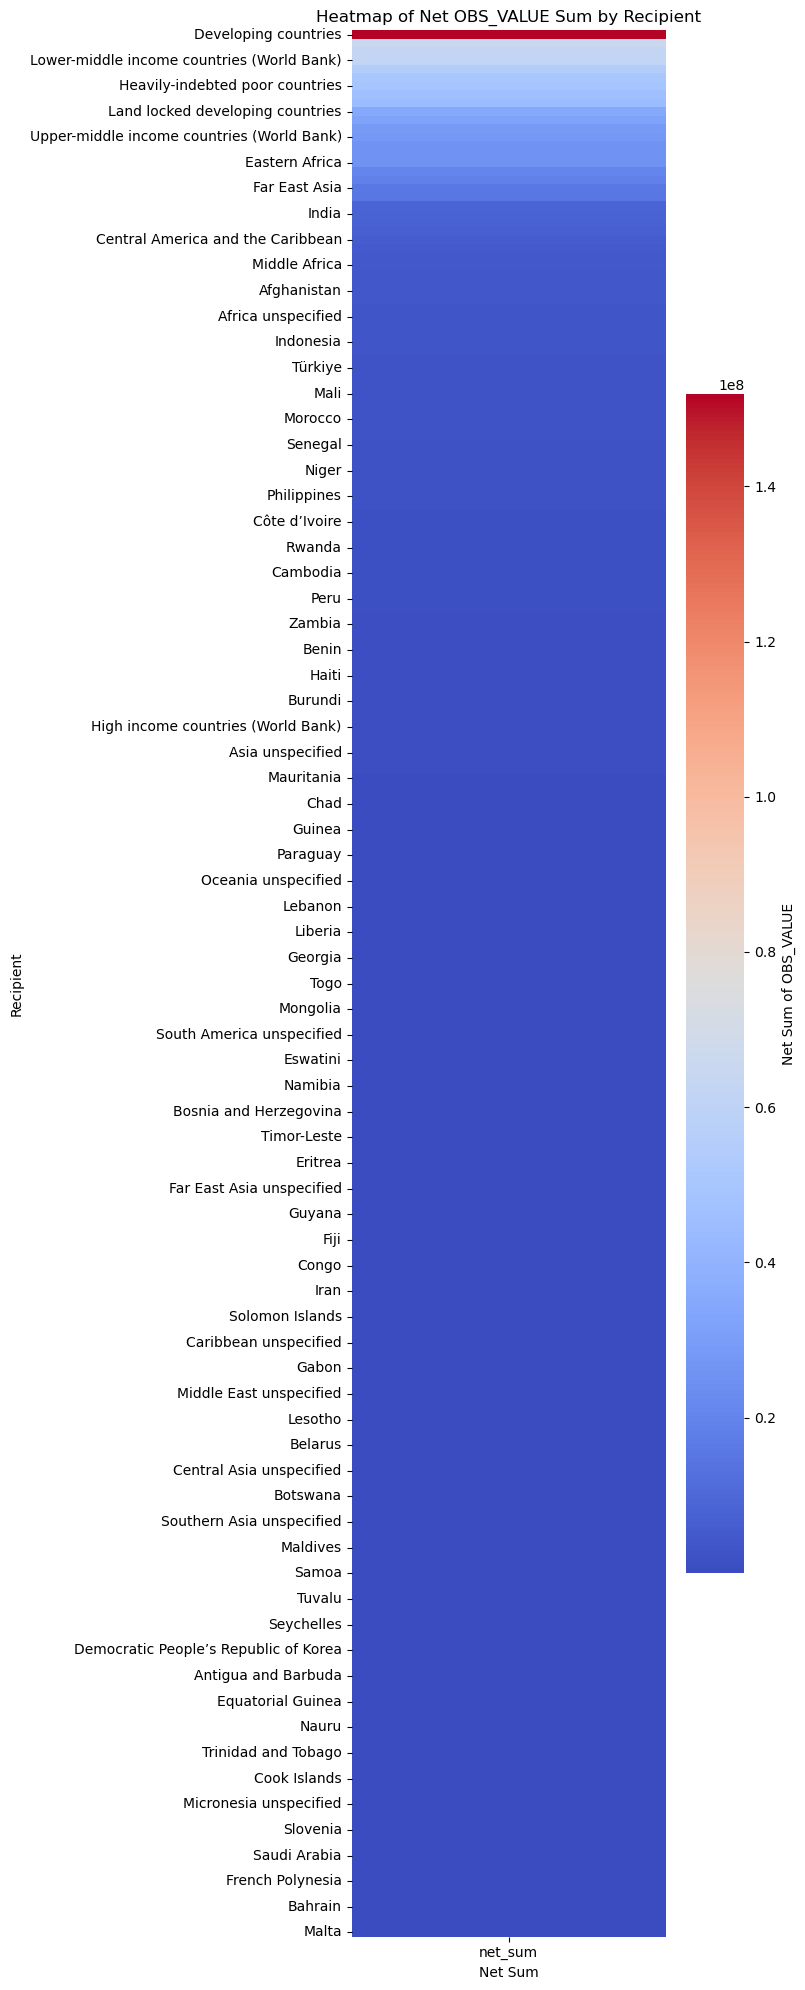

In [54]:
import seaborn as sns

import matplotlib.pyplot as plt

# Compute net sum of OBS_VALUE by Recipient
net_sum_by_recipient = ddf_cleaned.groupby('Recipient')['OBS_VALUE'].sum().compute()

# Convert to DataFrame for heatmap
net_sum_df = net_sum_by_recipient.to_frame(name='net_sum').sort_values('net_sum', ascending=False)

plt.figure(figsize=(8, 20))
sns.heatmap(net_sum_df, annot=False, cmap='coolwarm', cbar_kws={'label': 'Net Sum of OBS_VALUE'})
plt.title('Heatmap of Net OBS_VALUE Sum by Recipient')
plt.xlabel('Net Sum')
plt.ylabel('Recipient')
plt.tight_layout()
plt.show()

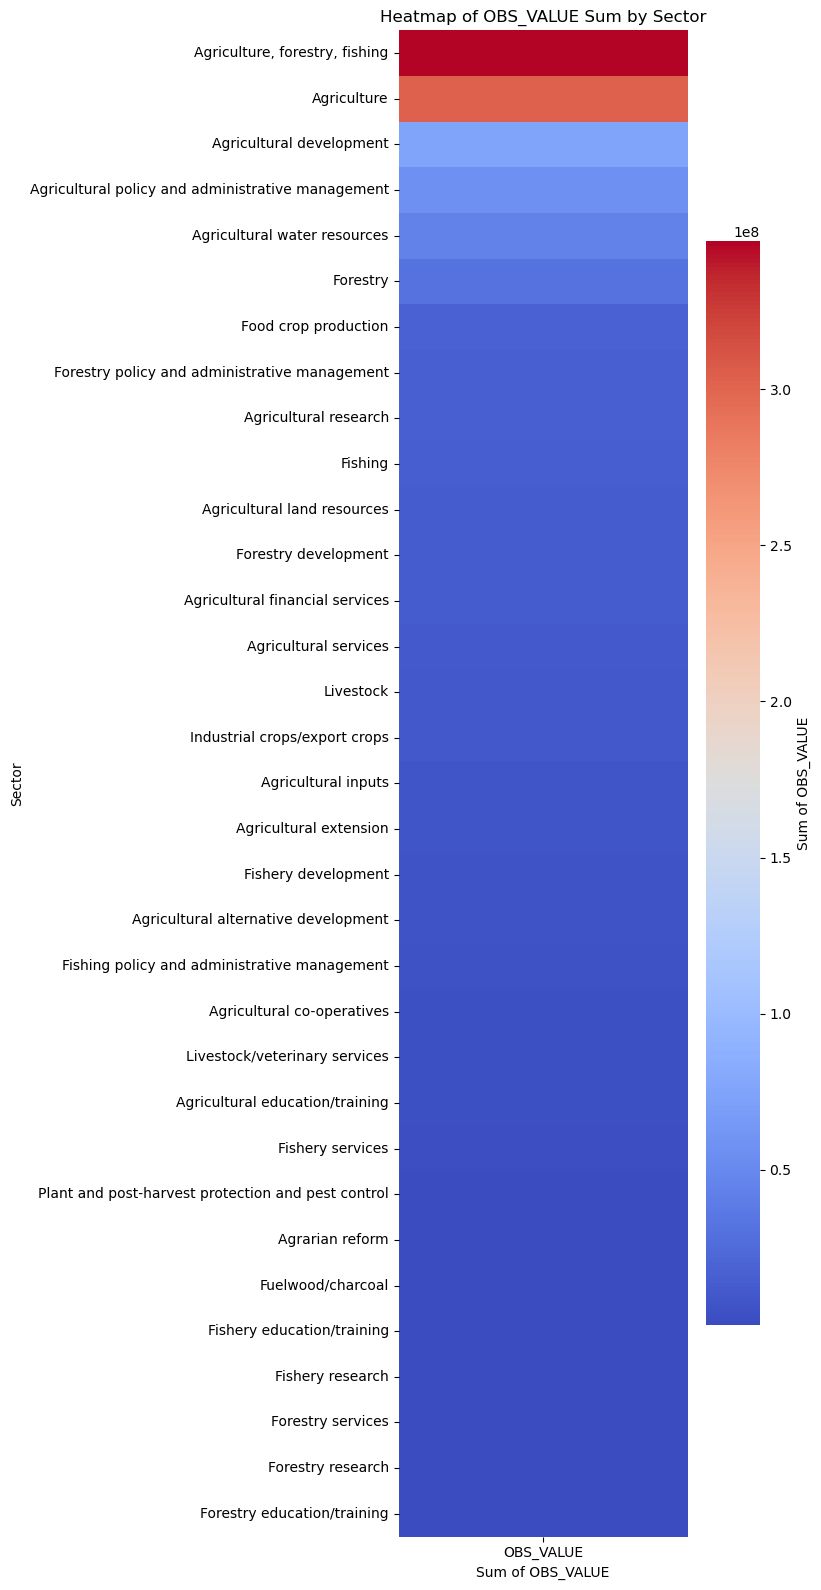

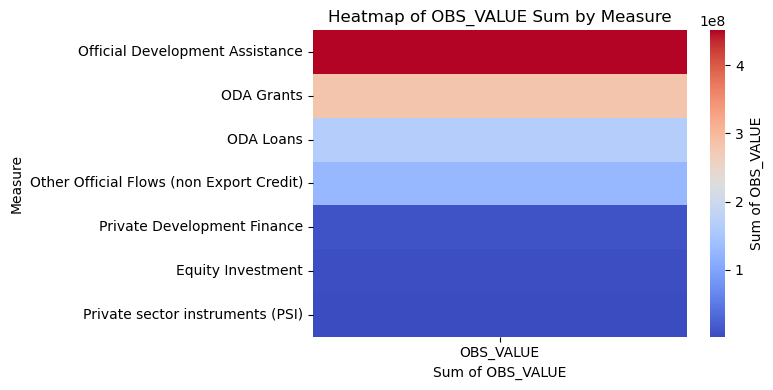

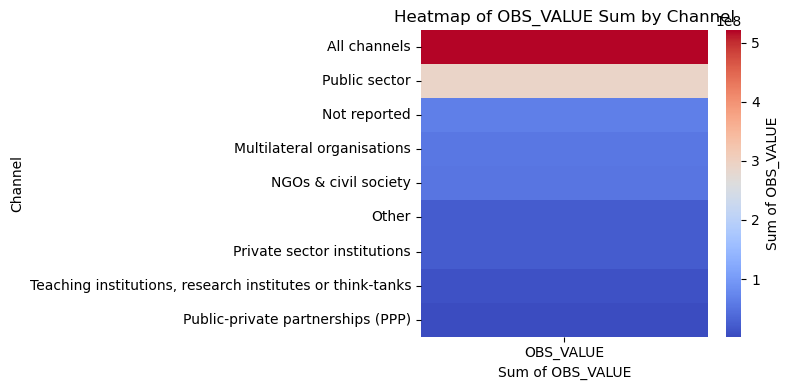

C:\Users\ayo\AppData\Local\Temp\ipykernel_4248\1831615512.py:19: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


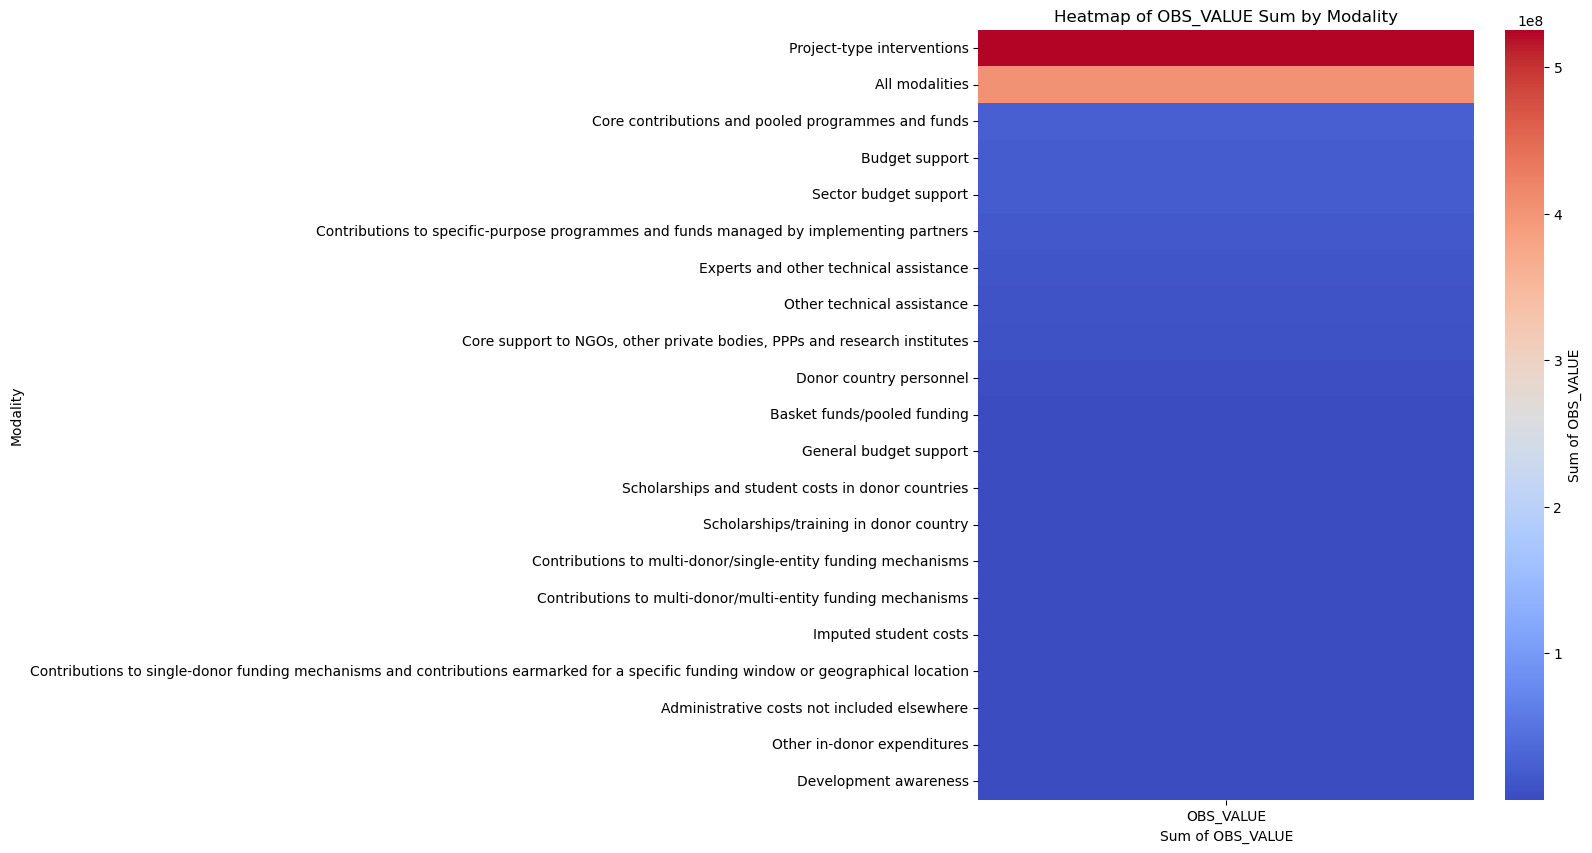

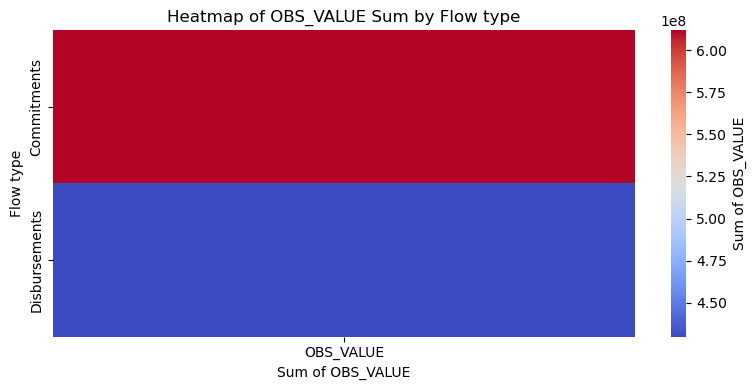

In [55]:
import seaborn as sns

import matplotlib.pyplot as plt

# List of columns to plot heatmaps for
group_cols = ['Sector', 'Measure', 'Channel', 'Modality', 'Flow type']

for col in group_cols:
    # Group by the column and sum OBS_VALUE
    grouped = ddf_cleaned.groupby(col)['OBS_VALUE'].sum().compute()
    # Convert to DataFrame for plotting
    grouped_df = grouped.to_frame(name='OBS_VALUE').sort_values('OBS_VALUE', ascending=False)
    
    plt.figure(figsize=(8, max(4, len(grouped_df) // 2)))
    sns.heatmap(grouped_df, annot=False, cmap='coolwarm', cbar_kws={'label': 'Sum of OBS_VALUE'})
    plt.title(f'Heatmap of OBS_VALUE Sum by {col}')
    plt.xlabel('Sum of OBS_VALUE')
    plt.ylabel(col)
    plt.tight_layout()
    plt.show()

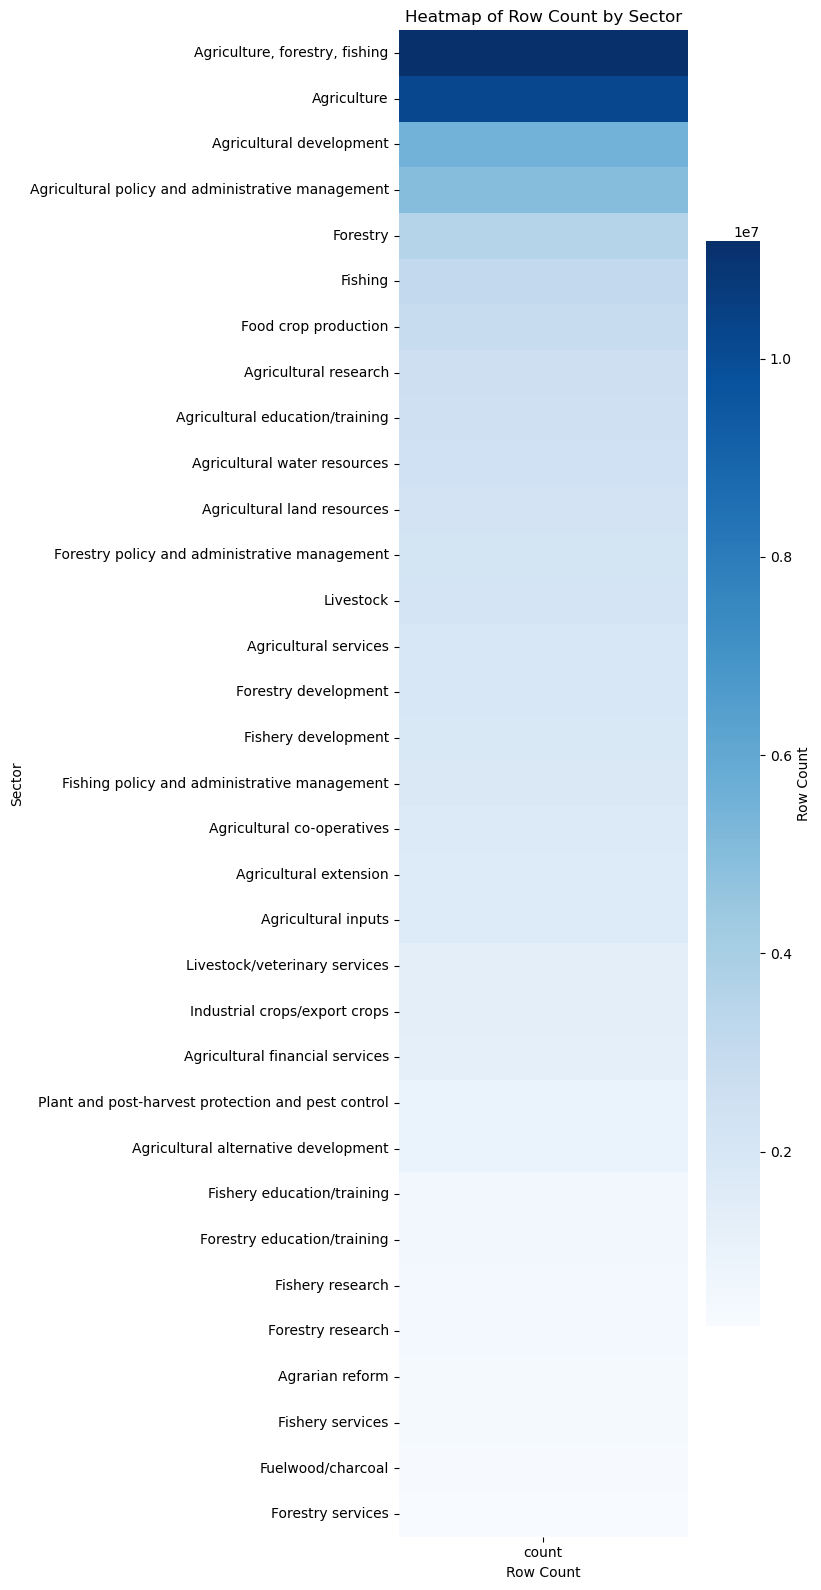

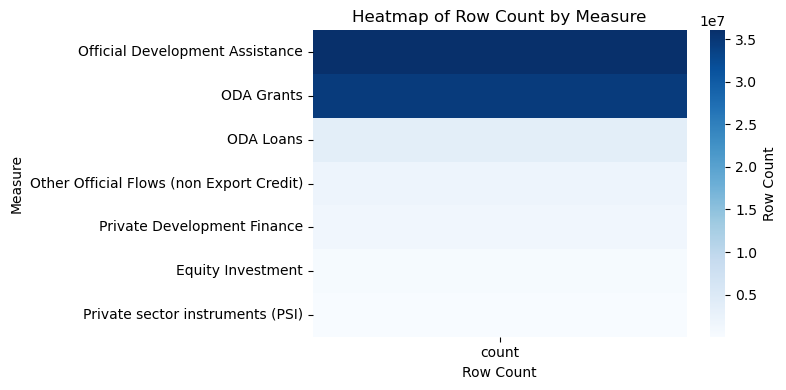

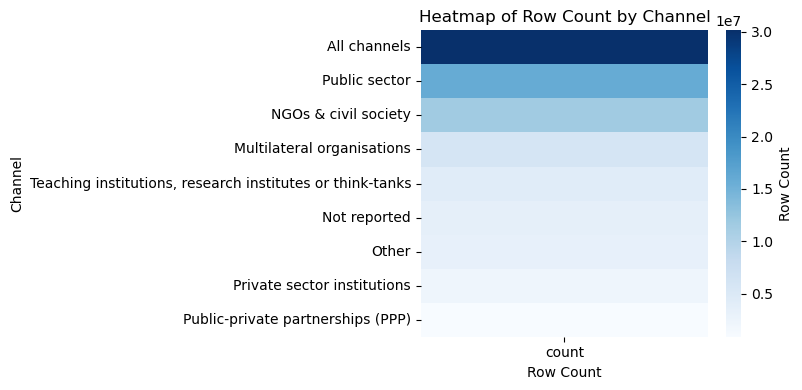

C:\Users\ayo\AppData\Local\Temp\ipykernel_4248\3365886965.py:13: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


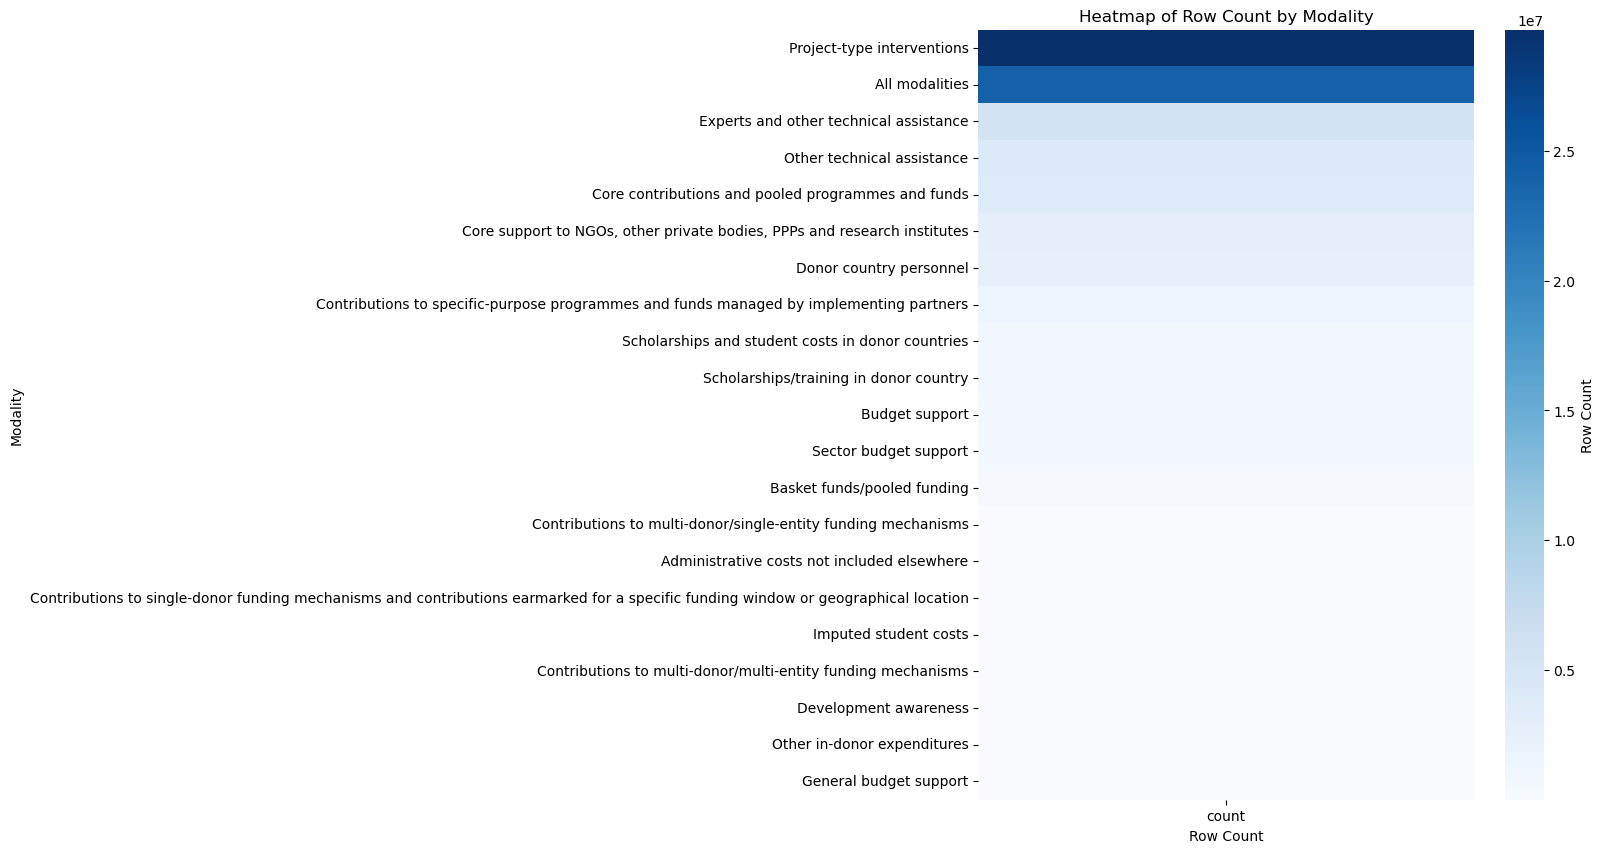

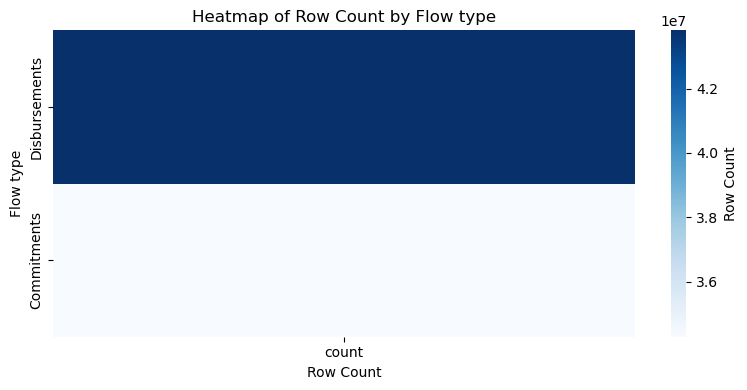

In [56]:
# Group by each column in group_cols and count the number of rows (instead of summing OBS_VALUE)
for col in group_cols:
    # Group by the column and count rows
    grouped_counts = ddf_cleaned.groupby(col).size().compute()
    # Convert to DataFrame for plotting
    grouped_counts_df = grouped_counts.to_frame(name='count').sort_values('count', ascending=False)
    
    plt.figure(figsize=(8, max(4, len(grouped_counts_df) // 2)))
    sns.heatmap(grouped_counts_df, annot=False, cmap='Blues', cbar_kws={'label': 'Row Count'})
    plt.title(f'Heatmap of Row Count by {col}')
    plt.xlabel('Row Count')
    plt.ylabel(col)
    plt.tight_layout()
    plt.show()

In [62]:
ddf_cleaned.head()

,DATAFLOW,Donor,Recipient,Sector,Measure,Channel,Modality,Flow type,Price base,MD_DIM,Drilldown dimension,UNIT_MEASURE,TIME_PERIOD,OBS_VALUE,BASE_PER,Observation status,Unit multiplier
0,OECD.DCD.FSD:DSD_CRS@DF_CRS(1.4),Multilaterals organisations,Belize,"Agriculture, forestry, fishing",Official Development Assistance,All channels,All modalities,Disbursements,Current prices,_T,Aggregate,USD,2012.0,5.745826,NaN,Normal value,Millions
1,OECD.DCD.FSD:DSD_CRS@DF_CRS(1.4),Multilaterals organisations,Belize,"Agriculture, forestry, fishing",Official Development Assistance,All channels,Project-type interventions,Disbursements,Current prices,_T,Aggregate,USD,2012.0,5.745826,NaN,Normal value,Millions
2,OECD.DCD.FSD:DSD_CRS@DF_CRS(1.4),Multilaterals organisations,Belize,"Agriculture, forestry, fishing",Official Development Assistance,All channels,Project-type interventions,Disbursements,Current prices,_T,Aggregate,USD,2012.0,5.745826,NaN,Normal value,Millions
3,OECD.DCD.FSD:DSD_CRS@DF_CRS(1.4),Multilaterals organisations,Belize,"Agriculture, forestry, fishing",Official Development Assistance,All channels,All modalities,Commitments,Current prices,_T,Aggregate,USD,2012.0,33.246406,NaN,Normal value,Millions
4,OECD.DCD.FSD:DSD_CRS@DF_CRS(1.4),Multilaterals organisations,Belize,"Agriculture, forestry, fishing",Official Development Assistance,All channels,Project-type interventions,Commitments,Current prices,_T,Aggregate,USD,2012.0,33.246406,NaN,Normal value,Millions
